In [1]:
#The goal of this analysis is to identify whether the powerball is a fair lottery
#Fair means the winning numbers in the powerball should align with the distribution of a random number generator
#If not, this means the powerball isn't "fair" and favors certain types of number

In [2]:
import pandas as pd
import numpy as np
import time
from datetime import datetime, timedelta
import requests as r
import statsmodels.api as sm
import matplotlib.pyplot as plt

/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
url = 'https://www.texaslottery.com/export/sites/lottery/Games/Powerball/Winning_Numbers/index.html_2013354932.html'
powerball = pd.read_html(url)[0]

In [4]:
powerball.head()

,Draw Date,Winning Numbers,Powerball,Power Play,Estimated Jackpot,Jackpot Winners,Jackpot Option
0,10/16/2023,2 - 27 - 31 - 44 - 64,18,3,$34 Million,Roll,NaN
1,10/14/2023,14 - 16 - 42 - 48 - 64,14,2,$20 Million,Roll,NaN
2,10/11/2023,22 - 24 - 40 - 52 - 64,10,2,$1.72 Billion,Out of State Winner,NaN
3,10/09/2023,16 - 34 - 46 - 55 - 67,14,3,$1.55 Billion,Roll,NaN
4,10/07/2023,47 - 54 - 57 - 60 - 65,19,3,$1.40 Billion,Roll,NaN


In [5]:
#There are a couple title rows, so we'll remove them

In [6]:
powerball = powerball.drop(powerball[powerball['Powerball'] == 'First Drawing for new $2 Powerball matrix was 1/18/2012.'].index)
powerball = powerball.drop(powerball[powerball['Powerball'] == 'First Drawing for new Powerball matrix was 10/07/2015.'].index)

In [7]:
powerball = powerball.reset_index(drop=True)

In [8]:
powerball['Draw Date'] = pd.to_datetime(powerball['Draw Date'])

In [9]:
powerball.head()

,Draw Date,Winning Numbers,Powerball,Power Play,Estimated Jackpot,Jackpot Winners,Jackpot Option
0,2023-10-16,2 - 27 - 31 - 44 - 64,18,3,$34 Million,Roll,NaN
1,2023-10-14,14 - 16 - 42 - 48 - 64,14,2,$20 Million,Roll,NaN
2,2023-10-11,22 - 24 - 40 - 52 - 64,10,2,$1.72 Billion,Out of State Winner,NaN
3,2023-10-09,16 - 34 - 46 - 55 - 67,14,3,$1.55 Billion,Roll,NaN
4,2023-10-07,47 - 54 - 57 - 60 - 65,19,3,$1.40 Billion,Roll,NaN


In [10]:
#Based on the Powerball rules, the 5 winning numbers selected DO NOT have to be in order
#Simply just that you selected the right numbers, which ranges from 1 to 69
#The Powerball ranges from 1 to 26
#Jackpot is selecting the correct winning numbers and the correct powerball

#Powerplay is a non-jackpot winnings multiplier
#It costs an extra dollar, but it can increase your non-jackpot winnings up to 10x
#10x only applies when jackpot is <= 150M

#Non-jackpot winnings are set cash amounts: https://www.powerball.com/powerball-prize-chart
#Further rules are here: 
#https://www.powerball.com/#:~:text=Select%20five%20numbers%20between%201,terminal%20randomly%20pick%20your%20numbers.

In [11]:
#I couldn't confirm this on the site, but it seems like the winning numbers do not repeat
#This means the numbers are selected WIHOUT replacement

In [12]:
#We have two main distributions to compare
#We have the distribution of the winning numbers
#Then we have a distribution for the powerball

In [13]:
#If the powerball is fair, then these distributions should represent a uniform distribution

In [14]:
#The newest rules went into place Oct 7th 2015, so we'll need to filter our table for this time
#Based on: https://en.wikipedia.org/wiki/Powerball#Basic_game

# Winning Numbers

In [15]:
#Let's make a random simulation of the powerball numbers
#Again, order doesn't matter, just that you have the 5 winning

In [16]:
#Again, we need to filter for Oct 7th 2015 as this is when the current rules went into affect

In [17]:
newest_hist = powerball[powerball['Draw Date'] >= '2015-10-07'].reset_index(drop=True)

In [18]:
newest_hist.head()

,Draw Date,Winning Numbers,Powerball,Power Play,Estimated Jackpot,Jackpot Winners,Jackpot Option
0,2023-10-16,2 - 27 - 31 - 44 - 64,18,3,$34 Million,Roll,NaN
1,2023-10-14,14 - 16 - 42 - 48 - 64,14,2,$20 Million,Roll,NaN
2,2023-10-11,22 - 24 - 40 - 52 - 64,10,2,$1.72 Billion,Out of State Winner,NaN
3,2023-10-09,16 - 34 - 46 - 55 - 67,14,3,$1.55 Billion,Roll,NaN
4,2023-10-07,47 - 54 - 57 - 60 - 65,19,3,$1.40 Billion,Roll,NaN


In [19]:
historical_draws = []

for i in range(len(newest_hist['Winning Numbers'])):
    #We have the number in a list, so I'm removing the ' - ' and then extracting each integer
    historical_draws.append([int(num) for num in newest_hist['Winning Numbers'][i].split(' - ')])

In [20]:
simulated_draws = [sorted(np.random.choice(range(1, 70), 5, replace=False).tolist()) for _ in range(len(newest_hist['Winning Numbers']))]

In [21]:
historical_flat = [item for sublist in historical_draws for item in sublist]
simulated_flat = [item for sublist in simulated_draws for item in sublist]

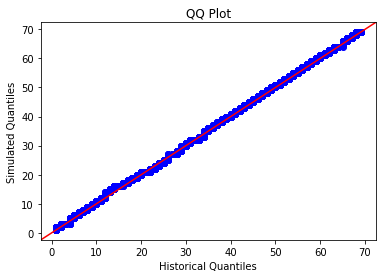

In [22]:
sm.qqplot_2samples(np.array(historical_flat), np.array(simulated_flat), line='45')
plt.xlabel('Historical Quantiles')
plt.ylabel('Simulated Quantiles')
plt.title('QQ Plot')
plt.savefig('powerball_qqplot_image.png', format='png', dpi=100)
plt.show()

In [23]:
#The historical draws line up nearly perfect to that of the simulated draws
#Here, we're able to prove that the lottery is fair and that there's no arbitrage opportunity

# Powerball Number

In [24]:
#However, does the same hold for the powerball number?

In [25]:
newest_hist['Powerball'] = newest_hist['Powerball'].astype('int')

In [26]:
historical_draws = sorted([i for i in newest_hist['Powerball'].dropna()])

In [27]:
simulated_draws = sorted([np.random.randint(1, 26) for i in range(len(newest_hist['Powerball'].dropna()))])

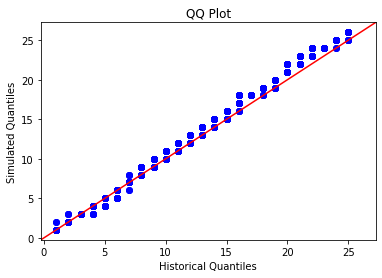

In [28]:
sm.qqplot_2samples(np.array(historical_draws), np.array(simulated_draws), line='45')
plt.xlabel('Historical Quantiles')
plt.ylabel('Simulated Quantiles')
plt.title('QQ Plot')
plt.show()

In [29]:
#Once again, we see the distribution of powerball numbes match that of a simulated distribution